In [1]:
var openDigger = require('../src/open_digger');
var year = 2023, startMonth = 1, endMonth = 12, startYear = 2018
var years = Array.from({ length: year - startYear + 1 }, (_, i) => i + startYear); // [2018, 2019, 2020, 2021, 2022]
var baseOptions = {
    startYear, endYear: year,
    startMonth, endMonth,
    groupTimeRange: 'year',
    order: 'DESC'
};

## 基金会洞察

In [2]:
var processTechFieldData = (label, title) => {
    var years = [2018, 2019, 2020, 2021, 2022, 2023];
    openDigger.index.openrank.getRepoOpenrank({
        ...baseOptions, labelIntersect: [label], limit: 20
    }).then(data => {
        openDigger.render.plotly(data.map(row => {
            return {
                x: years,
                y: row.openrank,
                name: row.name
            };
        }), {title: `OpenRank of ${title} 2018-2023`});
    });
};

### CNCF

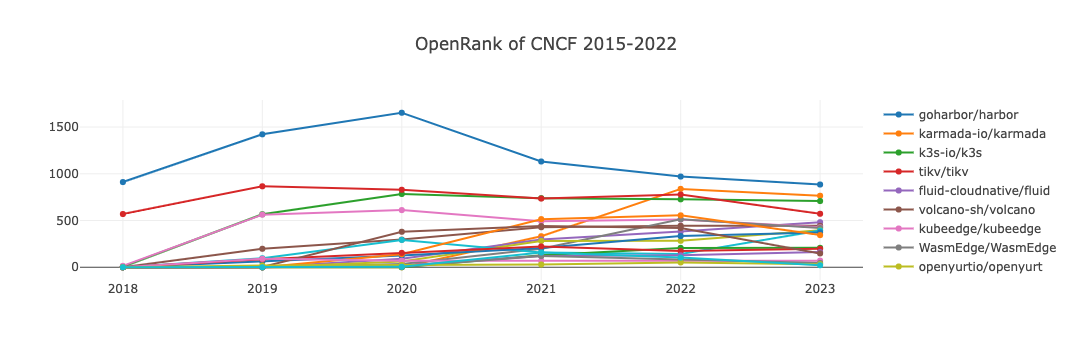

In [3]:
processTechFieldData(':foundations/linux_foundation/cncf', 'CNCF');

### lfai

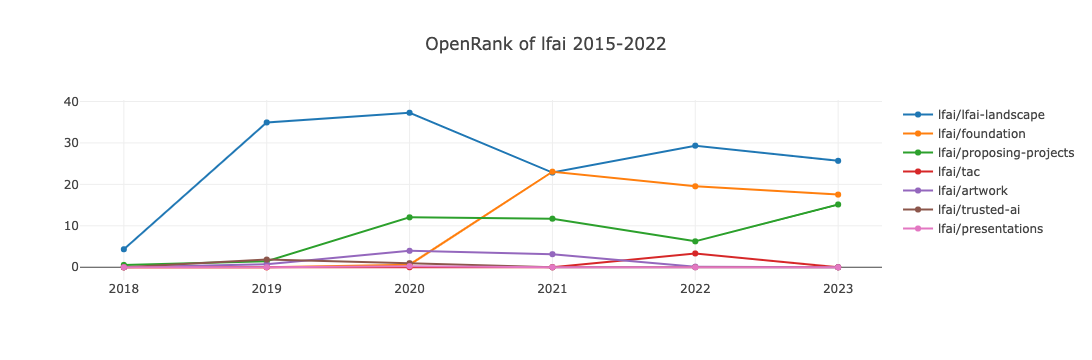

In [4]:
processTechFieldData(':foundations/linux_foundation/lfai', 'lfai');

### OpenAtom

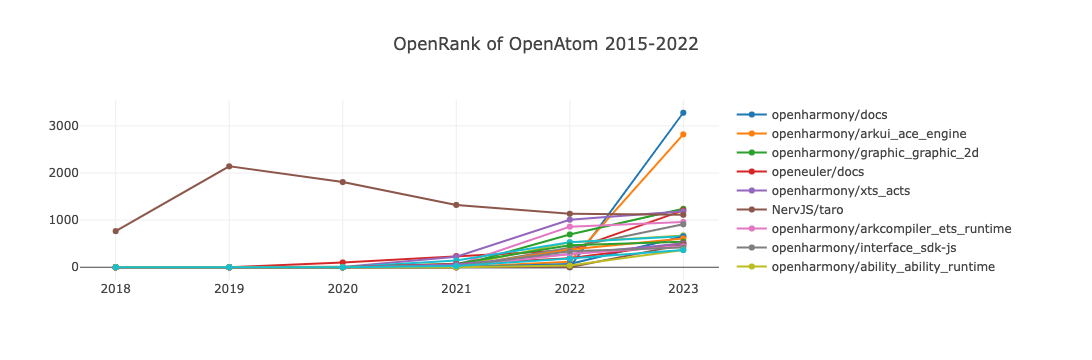

In [5]:
processTechFieldData(':foundations/openatom', 'OpenAtom');

### Apache

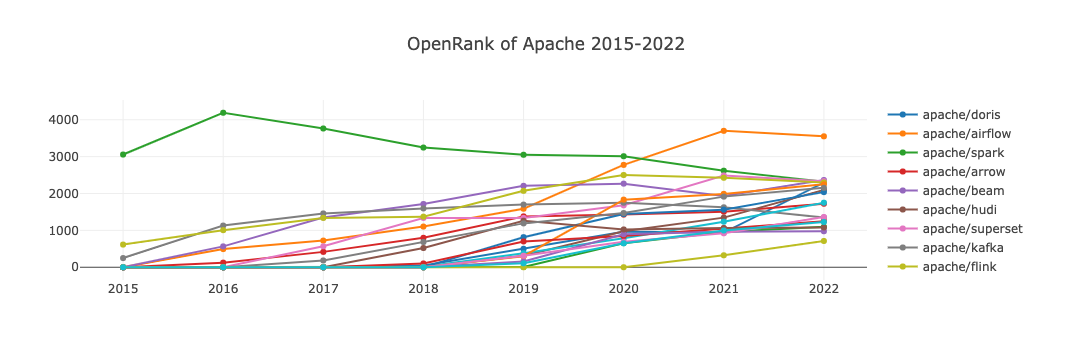

In [8]:
processTechFieldData(':foundations/apache', 'Apache');

### Eclipse

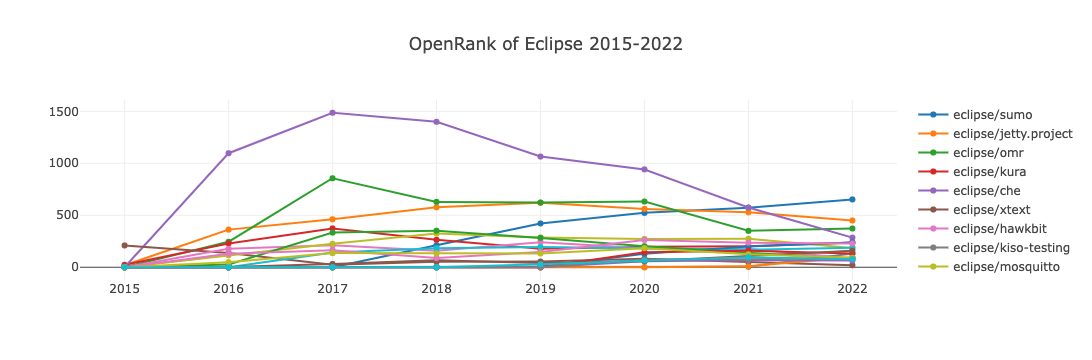

In [9]:
processTechFieldData(':foundations/eclipse', 'Eclipse');

### OpenInfra

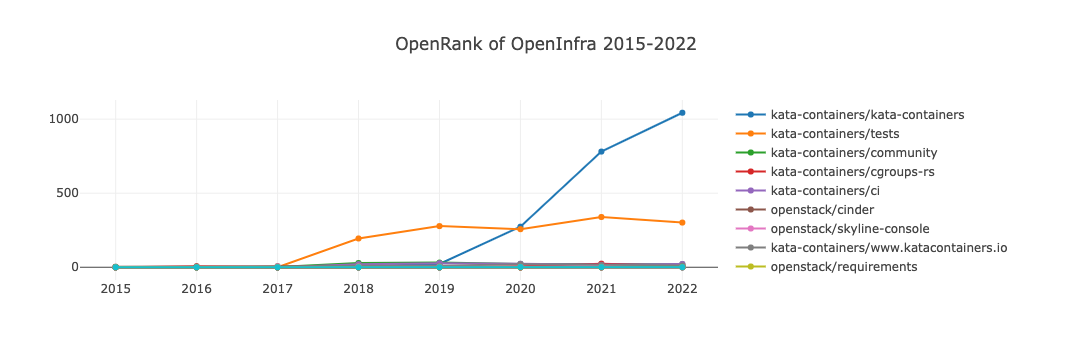

In [10]:
processTechFieldData(':foundations/openinfra', 'OpenInfra');

### OpenJs

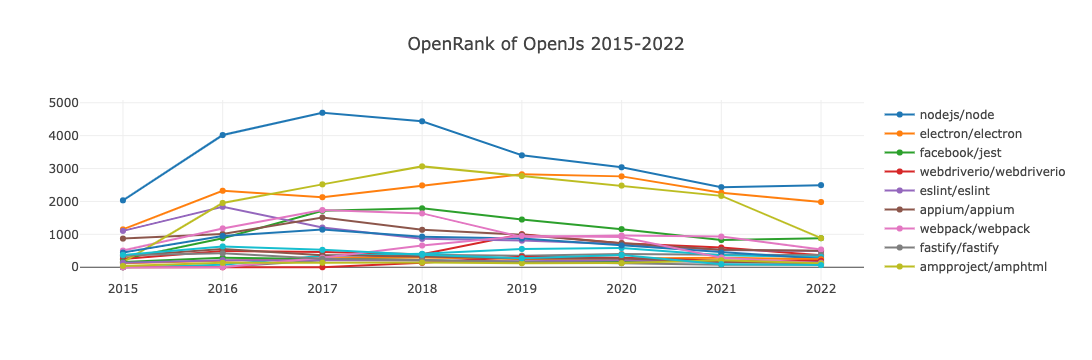

In [11]:
processTechFieldData(':foundations/openjs', 'OpenJs');